In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
from sklearn.metrics import mean_squared_error, log_loss, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import imageio
from IPython.display import HTML

In [0]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


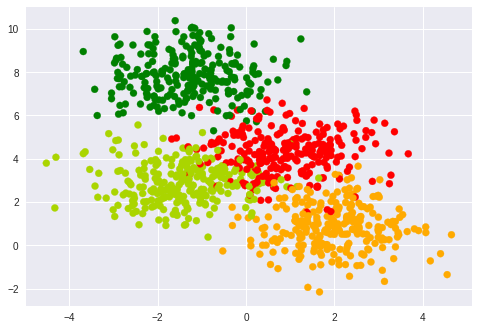

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)

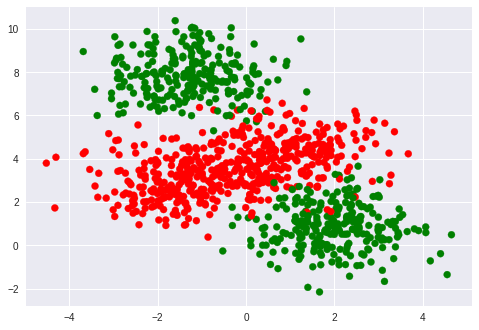

In [0]:
# Making only 2 labels for binary classification
labels_orig = labels
labels = np.mod(labels_orig, 2)
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)

In [0]:
#Train test split
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify=label, random_state=0)
print(X_train.shape, Y_train.shape)

(750, 2) (750,)


# Single Weight Update

# Creating a single weight update class 

In [0]:
class FFNN_singleWeightUpd:
  def __init__(self):
    self.b1 = 0
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.b2 = 0
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b3 = 0
    
  def sigmoid(self, x):
    return(1.0/(1.0 + np.exp(-x)))
    
  def forward_pass(self, x):
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    return(self.h3)
  
  def grad_w1(self, x, y):
    self.forward_pass(x)
    self.dw1 = (self.h3 - y) * (self.h3*(1-self.h3)) * self.w5 * (self.h1*(1-self.h1)) * self.x1
  
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return(np.array(Y_pred))
  
  def fit(self, X, Y, epochs = 1, learning_rate=1, display_loss=False, initialize=True):
    if(display_loss):
      loss={}
      w1={}
    
    if(initialize):
      self.b1 = 0
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.b2 = 0
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.b3 = 0
      
    for epoch in tqdm_notebook(range(epochs), total=epochs, unit='epoch'):
      dw1 = 0
      for x,y in zip(X, Y):
        self.grad_w1(x, y)
        dw1 += self.dw1
    
      m = X.shape[0]
      self.w1 -= learning_rate * dw1
    
      if(display_loss):
        w1[epoch] = self.w1
        Y_pred = self.predict(X)
        loss[epoch] = mean_squared_error(Y_pred, Y)
      
    if(display_loss):
      ax = plt.subplot(2,1,1)
      ax.plot(loss.values())
      plt.title('Loss Graph')
      plt.xlabel('epoch')
      plt.ylabel('MSE')
      plt.show()
      
      ax = plt.subplot(2,1,2)
      ax.plot(w1.values())
      plt.title('Weight graph')
      plt.xlabel('epoch')
      plt.ylabel('weight_w1')
      plt.show()
      
    

#Training

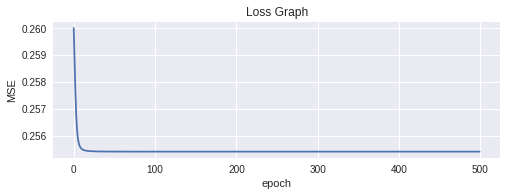

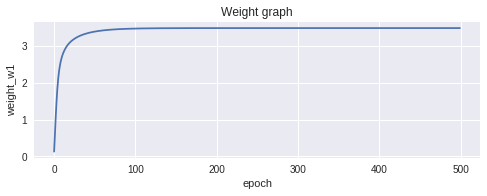

In [0]:
ffnn_w1 = FFNN_singleWeightUpd()
ffnn_w1.fit(X_train, Y_train, epochs=500, learning_rate=0.5, display_loss=True, initialize=True)

In [0]:
Y_train_pred = ffnn_w1.predict(X_train)
Y_train_pred_binarized = (Y_train_pred>0.5).astype('int').ravel()
Y_test_pred = ffnn_w1.predict(X_test)
Y_test_pred_binarized = (Y_test_pred>0.5).astype('int').ravel()
train_acc = accuracy_score(Y_train_pred_binarized, Y_train)
test_acc  = accuracy_score(Y_test_pred_binarized, Y_test)
print(train_acc, test_acc)

0.5026666666666667 0.492


In [0]:
Y_train_pred_binarized

Text(0.5, 1.0, 'Prediction')

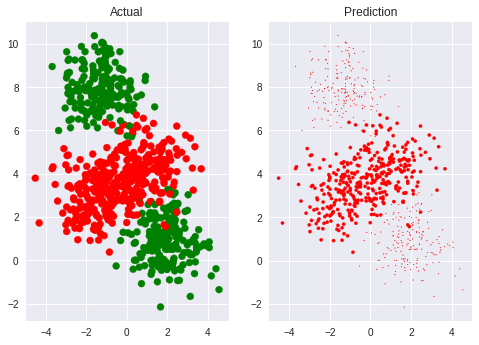

In [0]:
ax = plt.subplot(1,2,1)
ax.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=my_cmap)
plt.title('Actual')
ax = plt.subplot(1,2,2)
ax.scatter(X_train[:,0], X_train[:,1], c=Y_train_pred_binarized, cmap=my_cmap, s=10*np.abs(Y_train_pred_binarized - Y_train)+0.5)
plt.title('Prediction')

# All weight updates

In [0]:
class FFNN_allWeights:
  
  def __init__(self):
    np.random.seed(0)
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    
  def sigmoid(self, x):
    return(1.0/(1.0+np.exp(-x)))
  
  def forward_pass(self, x):
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    return(self.h3)
  
  def grad(self, x, y):
    self.forward_pass(x)
    
    self.dw5 = (self.h3 - y) * (self.h3*(1-self.h3)) * self.h1
    self.dw6 = (self.h3 - y) * (self.h3*(1-self.h3)) * self.h2
    self.db3 = (self.h3 - y) * (self.h3*(1-self.h3)) * 1
    
    self.dw1 = (self.h3 - y) * (self.h3*(1-self.h3)) * self.w5 * (self.h1*(1-self.h1)) * self.x1
    self.dw2 = (self.h3 - y) * (self.h3*(1-self.h3)) * self.w5 * (self.h1*(1-self.h1)) * self.x2
    self.db1  = (self.h3 - y) * (self.h3*(1-self.h3)) * self.w5 * (self.h1*(1-self.h1)) * 1
    
    self.dw3 = (self.h3 - y) * (self.h3*(1-self.h3)) * self.w6 * (self.h2*(1-self.h2)) * self.x1
    self.dw4 = (self.h3 - y) * (self.h3*(1-self.h3)) * self.w6 * (self.h2*(1-self.h2)) * self.x2
    self.db2  = (self.h3 - y) * (self.h3*(1-self.h3)) * self.w6 * (self.h2*(1-self.h2)) * 1
    
  
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return(np.array(Y_pred))
  
  def predict_h1(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h1)
    return(np.array(Y_pred))
  
  def predict_h2(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h2)
    return(np.array(Y_pred))
  
  def predict_h3(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(self.h3)
    return(np.array(Y_pred))
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialize=True, display_loss=False, display_weight=False):
    if(initialize):
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
      
    if(display_loss):
      w1, w2, w3, w4, w5, w6, b1, b2, b3, loss = {},{},{},{},{},{},{},{},{},{}
    
    for epoch in tqdm_notebook(range(epochs), total=epochs, unit='epoch'):
      
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
      for x,y in zip(X,Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
      
      m = X.shape[0]
      self.w1 -= learning_rate*dw1/m
      self.w2 -= learning_rate*dw2/m
      self.w3 -= learning_rate*dw3/m
      self.w4 -= learning_rate*dw4/m
      self.w5 -= learning_rate*dw5/m
      self.w6 -= learning_rate*dw6/m
      self.b1 -= learning_rate*db1/m
      self.b2 -= learning_rate*db2/m
      self.b3 -= learning_rate*db3/m
      
      if(display_loss):
        Y_pred = self.predict(X)
        loss[epoch] = mean_squared_error(Y_pred, Y)
        
      if(display_weight):
        weight_matrix = np.array([[0, self.b3, self.w5, self.w6, 0, 0], [self.b1, self.w1, self.w2, self.b2, self.w3, self.w4]])
        weight_matrices.append(weight_matrix)
    
    if(display_loss):
      plt.plot(loss.values())
      plt.title('Loss')
      plt.xlabel('epoch')
      plt.ylabel('MSE')
      
      
      

In [0]:
weight_matrices = []
ffnn_allwt = FFNN_allWeights()

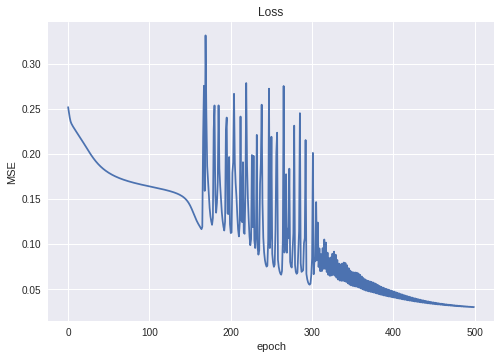

In [0]:

ffnn_allwt.fit(X_train, Y_train, epochs=500, learning_rate=5, display_loss=True, display_weight=True, initialize=True)

In [0]:
Y_train_pred = ffnn_allwt.predict(X_train)
Y_train_pred_binarized = (Y_train_pred>0.5).astype('int').ravel()
Y_test_pred = ffnn_allwt.predict(X_test)
Y_test_pred_binarized = (Y_test_pred>0.5).astype('int').ravel()
train_acc = accuracy_score(Y_train_pred_binarized, Y_train)
test_acc  = accuracy_score(Y_test_pred_binarized, Y_test)
print(train_acc, test_acc)

0.9653333333333334 0.96


In [0]:
Y_train_pred_binarized

Text(0.5, 1.0, 'Prediction')

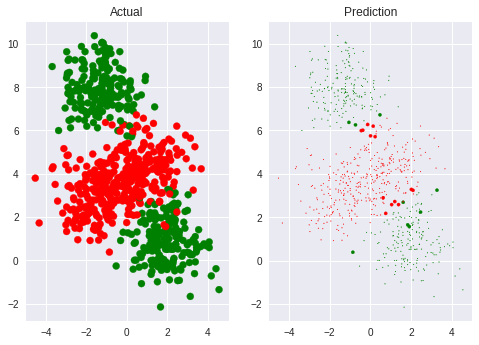

In [0]:
ax = plt.subplot(1,2,1)
ax.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=my_cmap)
plt.title('Actual')
ax = plt.subplot(1,2,2)
ax.scatter(X_train[:,0], X_train[:,1], c=Y_train_pred_binarized, cmap=my_cmap, s=10*np.abs(Y_train_pred_binarized - Y_train)+0.5)
plt.title('Prediction')

In [0]:
def make_meshgrid(x1, x2, h=0.2):
  x1_min, x1_max = x1.min()-0.5, x1.max()+0.5
  x2_min, x2_max = x2.min()-0.5, x2.max()+0.5
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
  return(xx1, xx2)
 
def plot_contourf(ax, xx1, xx2, predict, **params):
  yy = predict(np.c_[xx1.ravel(), xx2.ravel()])
  yy = yy.reshape(xx1.shape)
  ax.contourf(xx1, xx2, yy, **params)
  return


def plot_boundaries():
  xx1, xx2 = make_meshgrid(X_train[:,0], X_train[:,1])
  predict_fns = [ffnn_allwt.predict_h1, ffnn_allwt.predict_h2, ffnn_allwt.predict_h3]
  
  i=1
  for predict_fn in predict_fns:
    fig, ax = plt.subplots(figsize=(10,5))
    plot_contourf(ax, xx1, xx2, predict_fn, cmap=my_cmap, alpha=0.2)
    ax.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=my_cmap, alpha=0.8)
    ax.set_title('Boundary of neuron: '+str(i))
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())
    ax.set_xlabel('xx1')
    ax.set_ylabel('xx2')
    i+=1

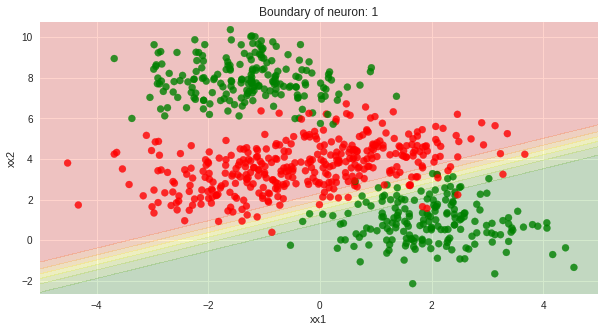

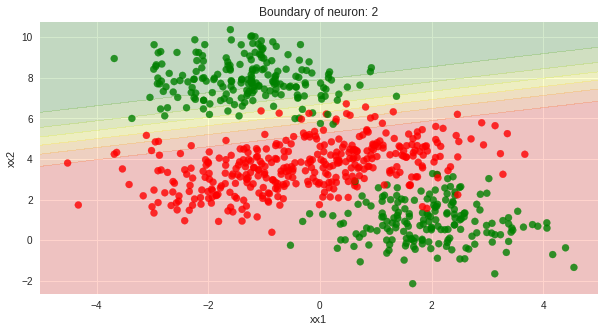

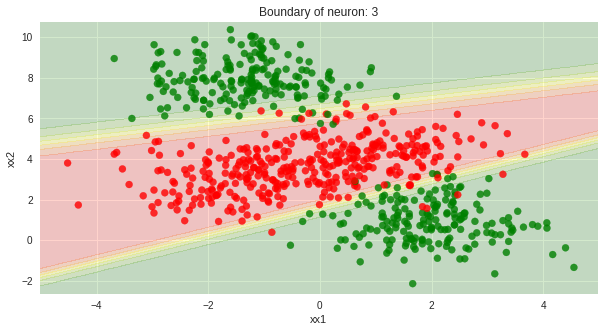

In [0]:
plot_boundaries()

In [0]:
def plot_heatmap(epoch):
  fig = plt.figure(figsize=(10,1))
  sns.heatmap(weight_matrices[epoch], annot=True, cmap=my_cmap)
  plt.title('Epoch: '+str(epoch))
  
  fig.canvas.draw()
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
  image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
  
  return image

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


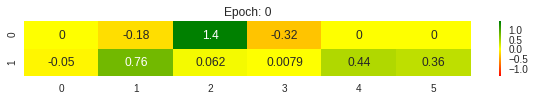

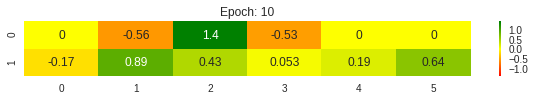

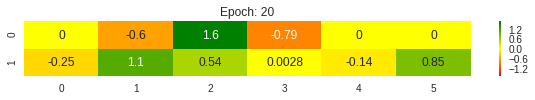

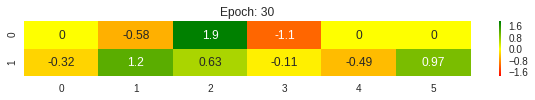

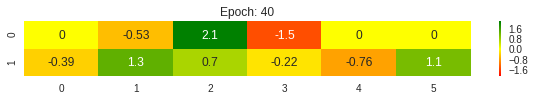

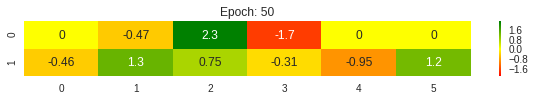

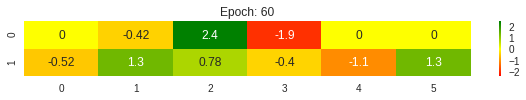

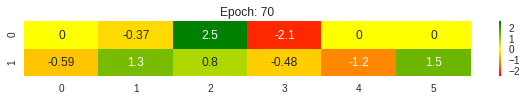

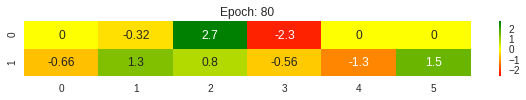

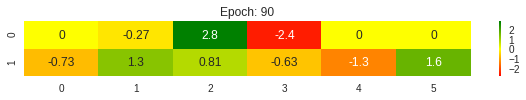

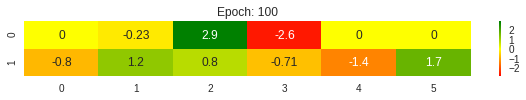

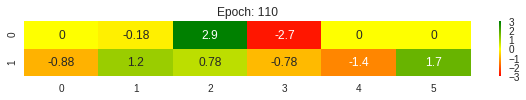

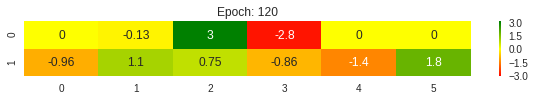

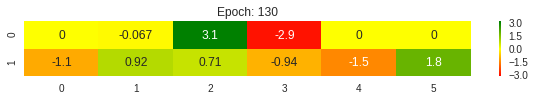

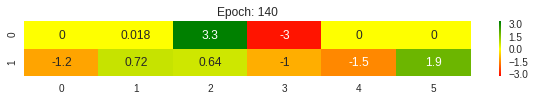

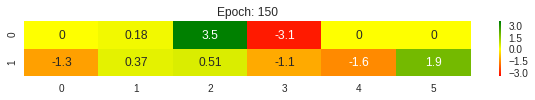

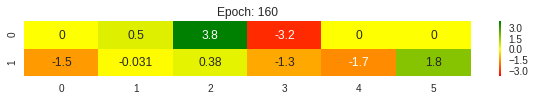

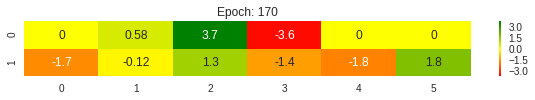

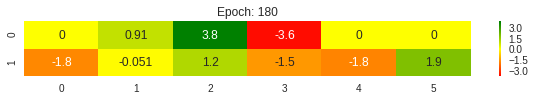

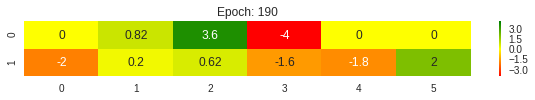

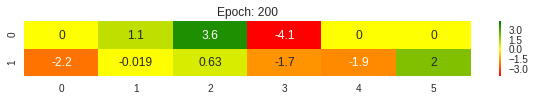

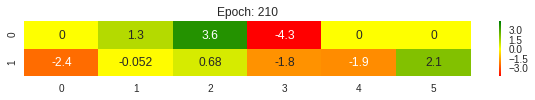

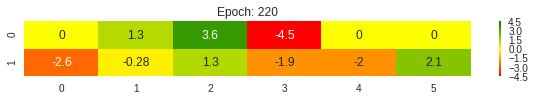

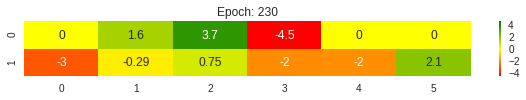

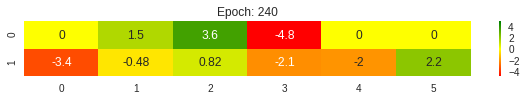

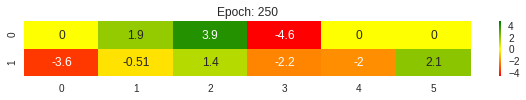

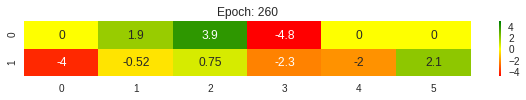

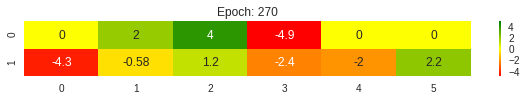

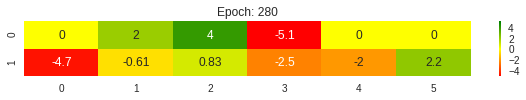

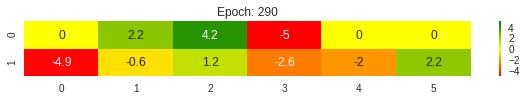

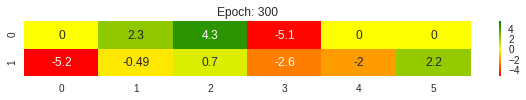

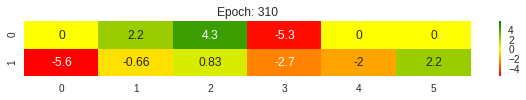

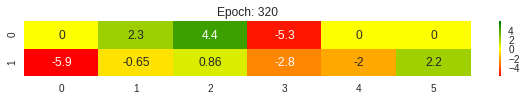

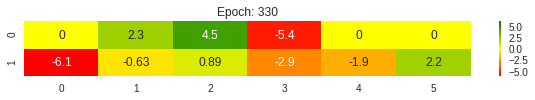

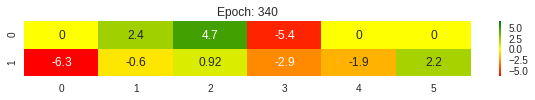

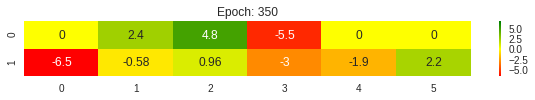

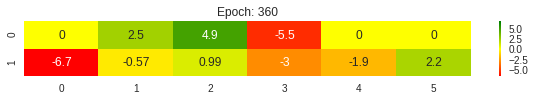

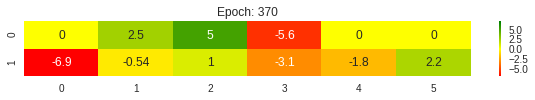

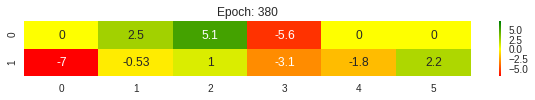

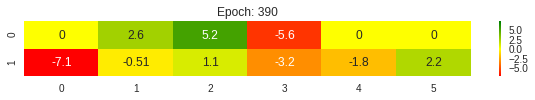

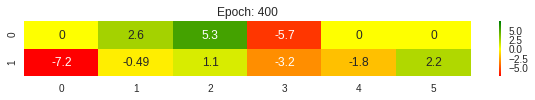

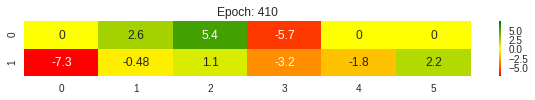

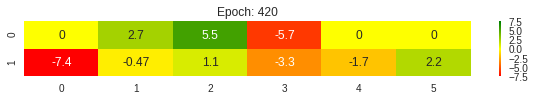

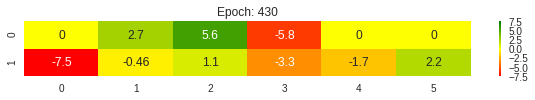

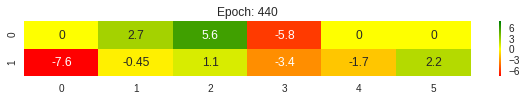

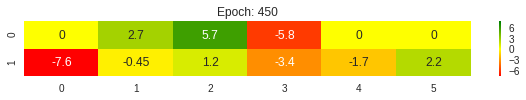

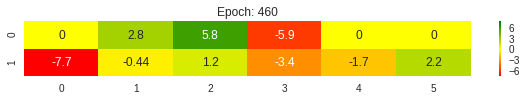

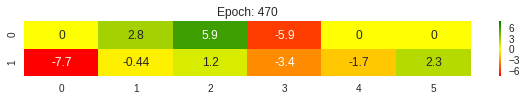

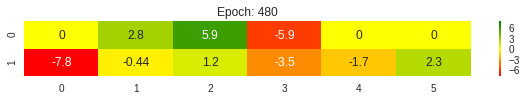

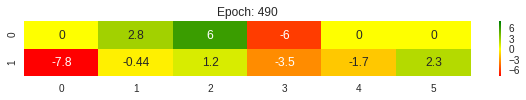

In [0]:
imageio.mimsave('./weights_viz.gif', [plot_heatmap(epoch) for epoch in range(0, len(weight_matrices), len(weight_matrices)//10)], fps=1)

In [0]:
from IPython import display
HTML('<img src="weights_viz.gif">')

#Multi Class Classification


In [220]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels_orig, stratify=labels_orig, random_state=0)
print(X_train.shape, Y_train.shape)
print(Y_train[:5])

(750, 2) (750,)
[0 3 3 2 2]


In [245]:
#One hot encoding the output
enc = OneHotEncoder()
Y_train_OH = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
Y_test_OH  = enc.fit_transform(np.expand_dims(Y_test,1)).toarray()
print(Y_train_OH[:5])

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [0]:
class FFNN_multiClass:
  def __init__(self):
    np.random.seed(0)
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.w7 = np.random.randn()
    self.w8 = np.random.randn()
    self.w9 = np.random.randn()
    self.w10 = np.random.randn()
    self.w11 = np.random.randn()
    self.w12 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.b4 = 0
    self.b5 = 0
    self.b6 = 0
    
  def sigmoid(self, x):
    return(1.0/(1.0 + np.exp(-x)))
  
  def forward_pass(self, x):
    
    #layer1
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    
    #layer2
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.a4 = self.w7*self.h1 + self.w8*self.h2 + self.b4
    self.a5 = self.w9*self.h1 + self.w10*self.h2 + self.b5
    self.a6 = self.w11*self.h1 + self.w12*self.h2 + self.b6
    exps    = np.sum([np.exp(self.a3), np.exp(self.a4), np.exp(self.a5), np.exp(self.a6)])
    self.h3 = np.exp(self.a3) / exps
    self.h4 = np.exp(self.a4) / exps
    self.h5 = np.exp(self.a5) / exps
    self.h6 = np.exp(self.a6) / exps
    
    return(np.array([self.h3, self.h4, self.h5, self.h6]))
  
  def grad(self, x, y):
    self.forward_pass(x)
    self.y1, self.y2, self.y3, self.y4 = y
    
    self.dw5 = (self.h3-self.y1) * self.h1 
    self.dw6 = (self.h3-self.y1) * self.h2
    self.db3 = (self.h3-self.y1)
                    
    self.dw7 = (self.h4-self.y2) * self.h1
    self.dw8 = (self.h4-self.y2) * self.h2
    self.db4 = (self.h4-self.y2)
    
    self.dw9 = (self.h5-self.y3) * self.h1
    self.dw10 = (self.h5-self.y3) * self.h2
    self.db5 = (self.h5-self.y3)
    
    self.dw11 = (self.h6-self.y4) * self.h1
    self.dw12 = (self.h6-self.y4) * self.h2
    self.db6 = (self.h6-self.y4)
                    
    self.dh1 = (self.h3-self.y1)*self.w5 + (self.h4-self.y2)*self.w7 + (self.h5-self.y3)*self.w9 + (self.h6-self.y4)*self.w11
    self.dw1 = self.dh1 * self.h1*(1-self.h1) * self.x1
    self.dw2 = self.dh1 * self.h1*(1-self.h1) * self.x2
    self.db1 = self.dh1 * self.h1*(1-self.h1)
                    
    self.dh2 = (self.h3-self.y1)*self.w6 + (self.h4-self.y2)*self.w8 + (self.h5-self.y3)*self.w10 + (self.h6-self.y4)*self.w12
    self.dw3 = self.dh2 * self.h2*(1-self.h2) * self.x1
    self.dw4 = self.dh2 * self.h2*(1-self.h2) * self.x2
    self.db2 = self.dh2 * self.h2*(1-self.h2)
    
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return(np.array(Y_pred))
    
  def fit(self, X, Y, epochs=1, learning_rate=1, initialize=True, display_loss=True, display_weight=True):
    
    if(initialize):
      np.random.seed(0)
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.w7 = np.random.randn()
      self.w8 = np.random.randn()
      self.w9 = np.random.randn()
      self.w10 = np.random.randn()
      self.w11 = np.random.randn()
      self.w12 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
      self.b4 = 0
      self.b5 = 0
      self.b6 = 0
    
    if(display_loss):
      loss={}
  
    for epoch in tqdm_notebook(range(epochs), total=epochs, unit='epoch'):
      
      dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8, dw9, dw10, dw11, dw12, db1, db2, db3, db4, db5, db6  = [0]*18
      for x, y in zip(X,Y):
        self.grad(x,y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        dw7 += self.dw7
        dw8 += self.dw8
        dw9 += self.dw9
        dw10 += self.dw10
        dw11 += self.dw11
        dw12 += self.dw12
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        db4 += self.db4
        db5 += self.db5
        db6 += self.db6
        
      m = X.shape[0]   
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.w7 -= learning_rate * dw7 / m
      self.w8 -= learning_rate * dw8 / m
      self.w9 -= learning_rate * dw9 / m
      self.w10 -= learning_rate * dw10 / m
      self.w11 -= learning_rate * dw11 / m
      self.w12 -= learning_rate * dw12 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      self.b4 -= learning_rate * db4 / m
      self.b5 -= learning_rate * db5 / m
      self.b6 -= learning_rate * db6 / m
      
      if(display_loss):
        Y_pred = self.predict(X)
        #print(Y_pred.shape, Y.shape)
        #print(np.argmax(Y, axis=1))
        loss[epoch] = log_loss(np.argmax(Y, axis=1), Y_pred)
        
      
      if(display_weight):
        weight_matrix = np.array([[self.b3, self.w5, self.w6, 
                                   self.b4, self.w7, self.w8, 
                                   self.b5, self.w9, self.w10, 
                                   self.b6, self.w11, self.w12], 
                                  [0, 0, 0,
                                   self.b1, self.w1, self.w2,
                                   self.b2, self.w3, self.w4, 
                                   0, 0, 0]])
        weight_matrices.append(weight_matrix)
      
    
    if(display_loss):
      plt.plot(loss.values())
      plt.title('Loss Graph')
      plt.xlabel('epoch')
      plt.ylabel('log_loss')
      
  

In [0]:
weight_matrices = []
ffnn_multiClass = FFNN_multiClass()


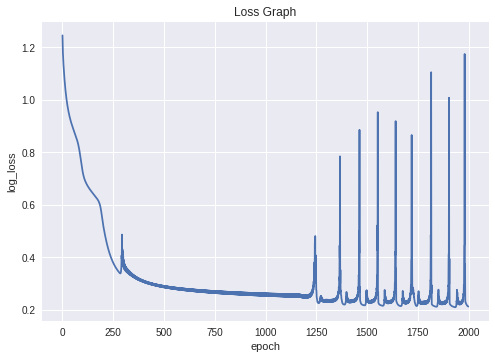

In [284]:
ffnn_multiClass.fit(X_train, Y_train_OH, epochs=2000, initialize=True, learning_rate=1, display_loss=True, display_weight=True)

In [269]:
weight_matrices

[]

In [0]:
def plot_heat_map(epoch):
  fig = plt.figure(figsize=(10,1))
  sns.heatmap(weight_matrices[epoch], annot=True, cmap=my_cmap)
  plt.title('Epoch: '+str(epoch))
  
  fig.canvas.draw()
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
  image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
  
  return image

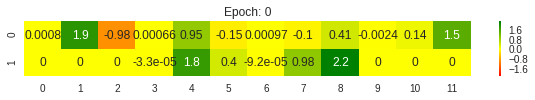

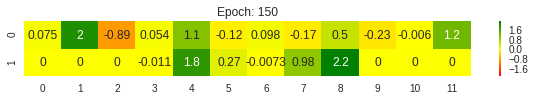

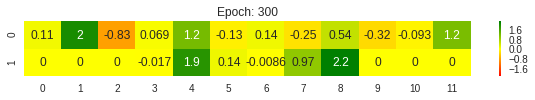

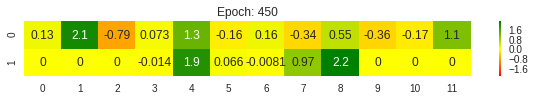

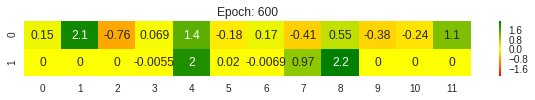

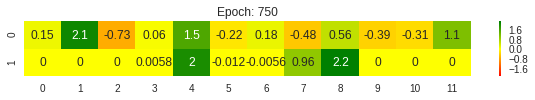

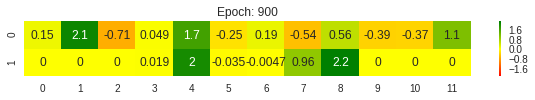

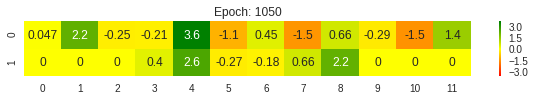

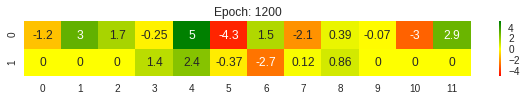

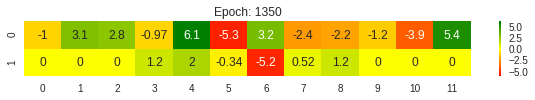

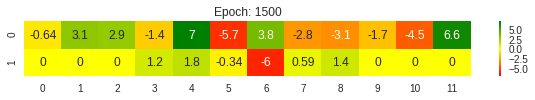

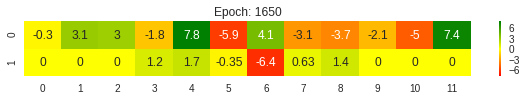

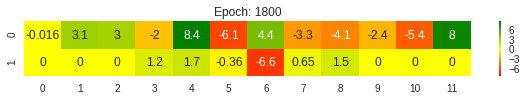

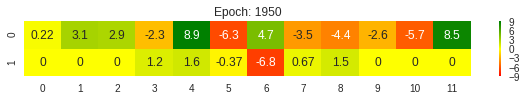

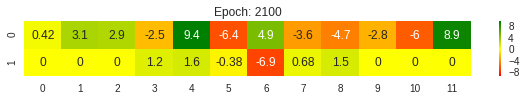

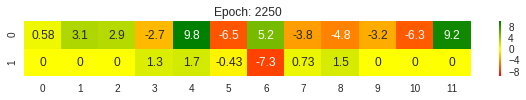

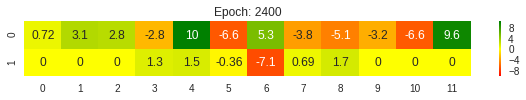

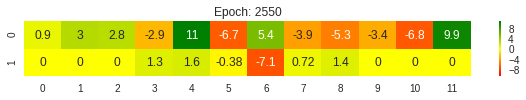

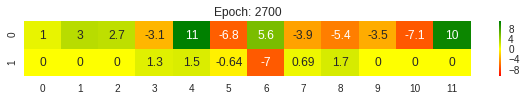

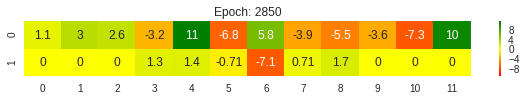

In [285]:
imageio.mimsave('./weights_viz_multi_class.gif', [plot_heat_map(i) for i in range(0,len(weight_matrices),len(weight_matrices)//20)], fps=1)

In [286]:
Y_train_pred = ffnn_multiClass.predict(X_train)
Y_train_pred = np.argmax(Y_train_pred, axis=1)
Y_test_pred = ffnn_multiClass.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred, axis=1)

train_acc = accuracy_score(Y_train_pred, Y_train)
test_acc  = accuracy_score(Y_test_pred, Y_test)
print(train_acc, test_acc)

0.916 0.936


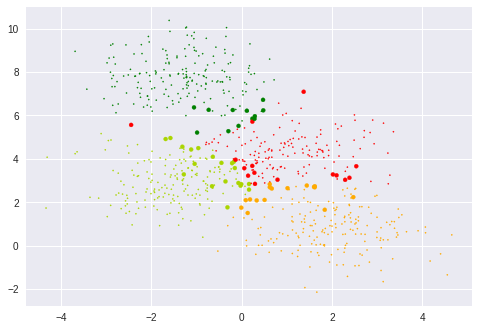

In [288]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train_pred, cmap=my_cmap, s=15*(np.abs(np.sign(Y_train_pred-Y_train))+.1))
plt.show()